#### Using pygalfitm with S-PLUS

This package was developed having s-plus in mind, so we created a simple function to fill the base parameters to the PyGalfitm class and sersic component params also.

First import Pygalfitm and connect to your splusdata account. (same as splus.cloud)

Also import from pygalfitm.VOs import splus module

In [2]:
from pygalfitm.VOs import splus

from pygalfitm import PyGalfitm
import splusdata

conn = splusdata.connect()

You have access to internal data


#### Set the data folder where all input and psf images will be stored and output folder where feedmes and results will be stored

In [11]:
import os

DATA_FOLDER = "dev/data"
OUTPUT_FOLDER = "dev/outputs"

if not os.path.exists(DATA_FOLDER):
    os.makedirs(DATA_FOLDER)
if not os.path.exists(OUTPUT_FOLDER):
    os.makedirs(OUTPUT_FOLDER)

#### Here we call **splus.get_splus_class** that is going to return a PyGalfitm object 

In [12]:
pygalgitm_object = splus.get_splus_class(
    name = "test", 
    ra = 51.30076502619, 
    dec = -32.9024762233, 
    cut_size = 200, 
    data_folder = DATA_FOLDER, 
    output_folder = OUTPUT_FOLDER, 
    remove_negatives = True,
    conn = conn, 
    bands=["z", "i", "J0861", "J0660", "r", "J0515", "g", "u"]
)

finished
finished
finished
finished
finished
finished
finished
finished


##### Check the active components

In [13]:
pygalgitm_object.active_components

['sersic']

##### Check the base 

In [14]:
pygalgitm_object.print_base()

A) dev/data/test_z.fits,dev/data/test_i.fits,dev/data/test_j0861.fits,dev/data/test_j0660.fits,dev/data/test_r.fits,dev/data/test_j0515.fits,dev/data/test_g.fits,dev/data/test_u.fits # Input data image (FITS file)
A1) z,i,j0861,j0660,r,j0515,g,u      # Nick names (band labels) 
A2) 8936.64,7670.59,8607.59,6613.88,6251.83,5133.15,4758.49,3533.29 # Effective wavelenghts
B) dev/outputs/testss.fits          # Output data image block
C) none                             # Sigma image name (made from data if blank or 'none')
D) dev/data/psf_test_z.fits,dev/data/psf_test_i.fits,dev/data/psf_test_j0861.fits,dev/data/psf_test_j0660.fits,dev/data/psf_test_r.fits,dev/data/psf_test_j0515.fits,dev/data/psf_test_g.fits,dev/data/psf_test_u.fits # Input PSF image and (optional) diffusion kernel
E) 1                                # PSF fine sampling factor relative to data 
F) none                             # Bad pixel mask (FITS image or ASCII coord list)
G) none                             # File w

##### Check the component

In [15]:
pygalgitm_object.print_component("sersic")

1) 100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0 1     band       # Position x [pixel]
2) 100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0 1     band       # Position y [pixel]
3) 15.117862,15.269087,15.100445,15.362182,15.510328,15.906772,16.053898,19.052067 3     band       # Integrated magnitude
4) 14.201047,13.942284,14.521119,14.776305,13.6819515,12.90412,12.861714,6.5319667 2     band       # R_e (effective radius) [pix]
5) 4,4,4,4,4,4,4,4                     2     band       # Sersic index n (de Vaucouleurs n=4)
9) 0.83502877,0.7817216,0.80508494,0.82325613,0.7813333,0.85205245,0.86291546,0.5782918 1     band       # Axis ratio (b/a)
10) 84.425285,84.90772,-89.41575,89.359314,84.7104,38.007793,79.98894,87.11189 1     band       # Position angle (PA) [deg: Up=0, Left=90]
Z) 0                                                    # Skip this model in output image? (yes=1, no=0)


#### Write the feedme and run

In [17]:
pygalgitm_object.write_feedme()
_ = pygalgitm_object.run()

#### Read output and plots

In [19]:
from pygalfitm.read import read_output_to_class

In [21]:
## This It reads the .band output and returns a PyGalfitm instance 
## with all parameters from the output.band loaded into the base and components.

out_pygal = read_output_to_class(os.path.join(OUTPUT_FOLDER, "testss.galfit.01.band"))

In [23]:
out_pygal.print_base()

A) dev/data/test_z.fits,dev/data/test_i.fits,dev/data/test_j0861.fits,dev/data/test_j0660.fits,dev/data/test_r.fits,dev/data/test_j0515.fits,dev/data/test_g.fits,dev/data/test_u.fits       # Input data image (FITS file)
A1) z,i,j0861,j0660,r,j0515,g,u      # Band labels
A2) 8936.64,7670.59,8607.59,6613.88,6251.83,5133.15,4758.49,3533.29      # Band wavelengths
B) dev/outputs/testss.fits          # Output data image block
C) none,none,none,none,none,none,none,none 0.000    # Sigma image and min. sigma factor (made from data if blank or "none")
D) dev/data/psf_test_z.fits,dev/data/psf_test_i.fits,dev/data/psf_test_j0861.fits,dev/data/psf_test_j0660.fits,dev/data/psf_test_r.fits,dev/data/psf_test_j0515.fits,dev/data/psf_test_g.fits,dev/data/psf_test_u.fits           # Input PSF image and (optional) diffusion kernel
E) 1                                # PSF fine sampling factor relative to data
F) none,none,none,none,none,none,none,none       # Bad pixel mask (FITS image or ASCII coord lis

In [24]:
out_pygal.print_component("sersic")

1) 102.411,102.411,102.411,102.411,102.411,102.411,102.411,102.411 1,0,0,0,0,0,0,0 band       #      Position x
2) 99.886,99.886,99.886,99.886,99.886,99.886,99.886,99.886 1,0,0,0,0,0,0,0 band       #      Position y
3) 13.465,13.597,13.486,13.815,13.912,14.285,14.434,15.008 1,1,1,0,0,0,0,0 band       #  Integrated magnitude
4) 90.480,91.018,90.619,91.467,91.621,92.096,92.255,92.776 1,1,0,0,0,0,0,0 band       #  R_e (effective radius)   [pix]
5) 3.388,3.378,3.386,3.369,3.365,3.356,3.353,3.342 1,1,0,0,0,0,0,0 band       #  Sersic index n (de Vaucouleurs n=4)
6) 0,0,0,0,0,0,0,0                     0,0,0,0,0,0,0,0 band       #     -----
7) 0,0,0,0,0,0,0,0                     0,0,0,0,0,0,0,0 band       #     -----
8) 0,0,0,0,0,0,0,0                     0,0,0,0,0,0,0,0 band       #     -----
9) 0.972,0.919,0.942,0.960,0.918,0.989,1.000,0.715 1,0,0,0,0,0,0,0 band       #  Axis ratio (b/a)
10) -95.575,-95.092,-269.416,-90.641,-95.290,-141.992,-100.011,-92.888 1,0,0,0,0,0,0,0 band       #  Posi

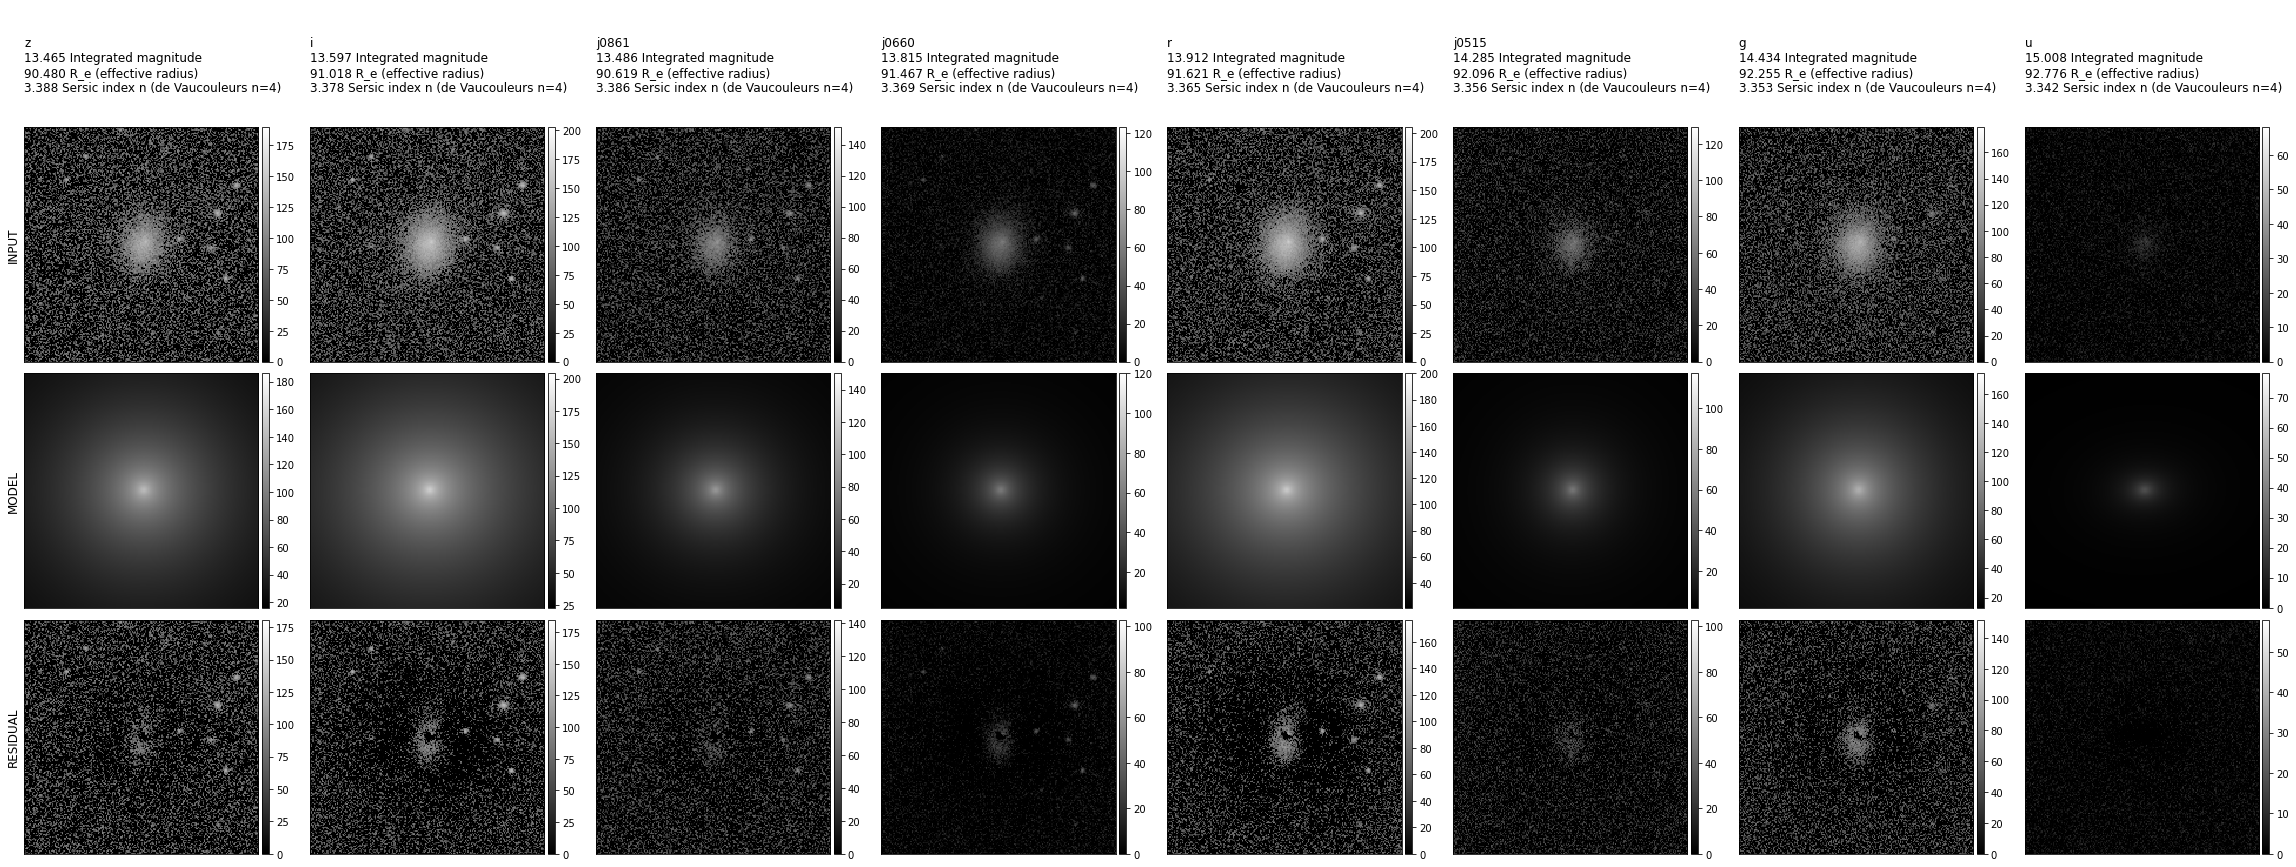

In [25]:
out_pygal.gen_plot(
    "sersic", 
    return_plot = False, 
    plot_parameters=[3, 4, 5], 
    colorbar=True
)